In [183]:
!pip install brian2
!pip install matplotlib==3.1.2

In [0]:
from brian2 import *
from matplotlib import pyplot as plt
%matplotlib inline

here I add draw_utils.py from my Google _ drive

In [0]:
import sys
sys.path.append('/content/drive/My Drive/neuroscience')
import draw_utils

In [0]:
start_scope()

first I define parameters we need for equations :

In [0]:
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
gl = 5e-5*siemens*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
g_na = 100*msiemens*cm**-2 * area
g_kd = 30*msiemens*cm**-2 * area
VT = -63*mV

next , I write the equations we need (Hodgkin-Huxley equations)

In [0]:
eqs_HH = '''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I)/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
I : amp
'''

then using brian pachage , we make a neural network containing 1 neuron :

In [0]:
Group = NeuronGroup(1, eqs_HH,threshold='v > -50*mV',refractory='v > -40*mV',method='exponential_euler')

then I run simulation using StateMonitor and with given initial conditions :

1) first for ' v ' :

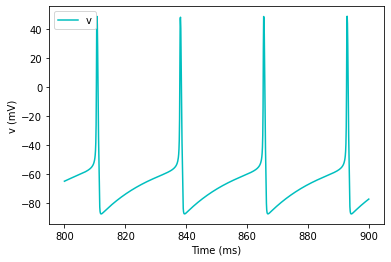

In [198]:
statemon_v = StateMonitor(Group, 'v', record=True)
Group.v = El
Group.I = 200*pA
run(100*ms)
plot(statemon_v.t/ms, statemon_v.v[0]/mV, '-c',label='v')
xlabel('Time (ms)')
ylabel('v (mV)');
legend(loc='best',fontsize=10)

for ' m ' :

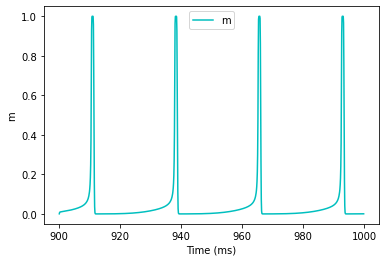

In [199]:
statemon_m = StateMonitor(Group, 'm', record=True)
Group.v = El
Group.I = 200*pA
run(100*ms)
plot(statemon_m.t/ms, statemon_m.m[0], '-c',label='m')
xlabel('Time (ms)')
ylabel('m');
legend(loc='best',fontsize=10)

for ' n ' :

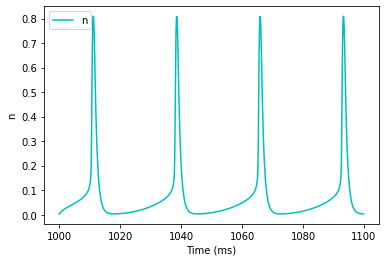

In [200]:
statemon_n = StateMonitor(Group, 'n', record=True)
Group.v = El
Group.I = 200*pA
run(100*ms)
plot(statemon_n.t/ms, statemon_n.n[0], '-c',label='n')
xlabel('Time (ms)')
ylabel('n');
legend(loc='best',fontsize=10)

for ' h ' :

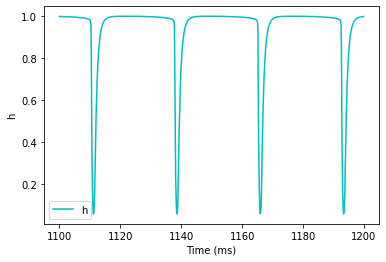

In [201]:
statemon_h = StateMonitor(Group, 'h', record=True)
Group.v = El
Group.I = 200*pA
run(100*ms)
plot(statemon_h.t/ms, statemon_h.h[0], '-c',label='h')
xlabel('Time (ms)')
ylabel('h');
legend(loc='best',fontsize=10)

2) 

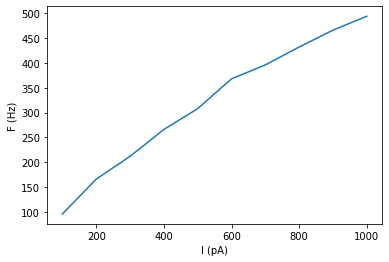

In [203]:
I_list=[]
t_list=[]
for i in numpy.linspace(1,10,10):
  spikemon = SpikeMonitor(Group)
  Group.I=(100*i)*pA
  time=500*ms
  run(time)
  I_list.append((100*i)*pA)
  t_list.append(len(spikemon.t))
plot(I_list/pA,t_list/(time))
xlabel('I (pA)')
ylabel('F (Hz)');

when we increase OutPut current , the number of spikes in a specific period increases , because of the equations , time for a spike decrease and so the number of spikes in a speciific time increases and the , the frequency of spikes increases .

3)

<neurongroup_4.I: array([0.]) * amp>


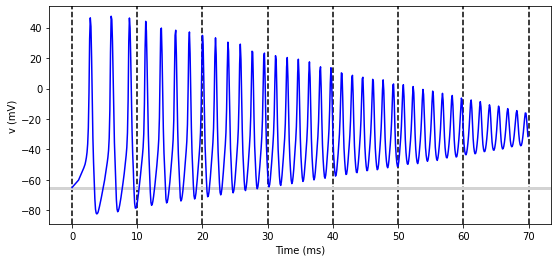

In [212]:
start_scope()
Group = NeuronGroup(1, eqs_HH,threshold='v > -50*mV',refractory='v > -40*mV',method='exponential_euler')
Group.v = El
statemon = StateMonitor(Group, 'v', record=0)
spikemon = SpikeMonitor(Group, variables='v')
# I use the run_regularly instead of a loop
Group.I = 0*nA
Group.run_regularly('I = I + 1*nA', dt=1*ms)
print(Group.I)
run(70*ms)
figure(figsize=(9, 4))
# I use the loop just to draw the vertical lines
for l in range(8):
    axvline(l*10, ls='--', c='k')
axhline(El/mV, ls='-', c='lightgray', lw=3)
plot(statemon.t/ms, statemon.v[0]/mV, '-b')
xlabel('Time (ms)')
ylabel('v (mV)');

as we see in the previous part , as we increase output current , the time of a spark decrease and so frequency of spikes increases and as we can see in the plot ,frequency incresed as output current increased 

4)

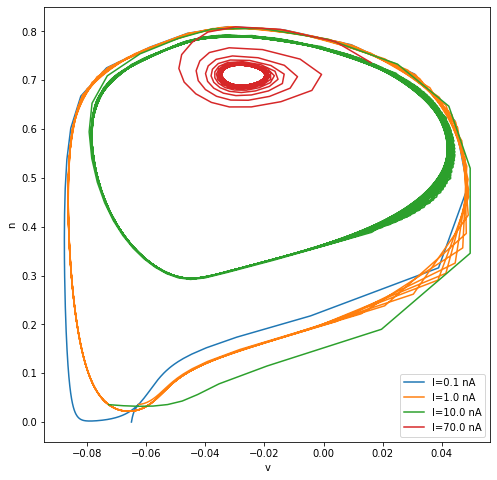

In [206]:
start_scope()
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
Group.v = El
time=50*ms

for i in [0.1 , 1, 10 , 70]*nA:
  statemon_v = StateMonitor(Group, 'v', record=True)
  statemon_n = StateMonitor(Group, 'n', record=True)
  Group.I = i
  run(time)
  ax.plot(statemon_v.v[0],statemon_n.n[0],label=r'I={} nA'.format(i/nA))
ylabel('n')
xlabel('v')
legend(fontsize=10)

5)


No handles with labels found to put in legend.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


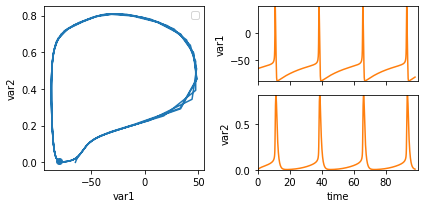

In [213]:
start_scope()
Group = NeuronGroup(1, eqs_HH,threshold='v > -50*mV',refractory='v > -40*mV',method='exponential_euler')
statemon_v = StateMonitor(Group, 'v', record=True)
statemon_n = StateMonitor(Group, 'n', record=True)
time=100*ms
Group.v = El
Group.I = 200*pA
run(time)
draw_utils.phaseplane_animation(statemon_v.t/ms, statemon_v.v[0]/mV, statemon_n.n[0])


animation file (a .gif file) attache to file 

**2)**1)

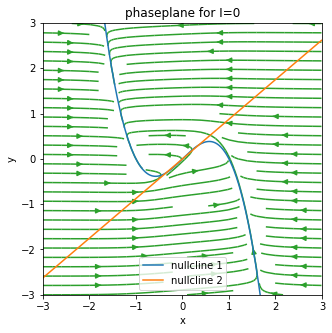

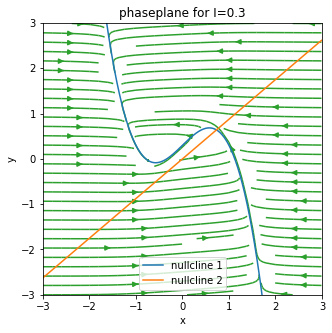

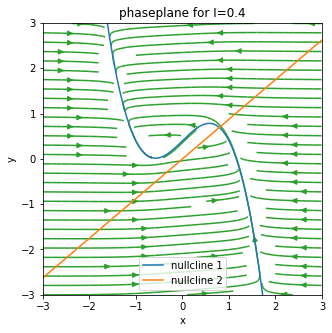

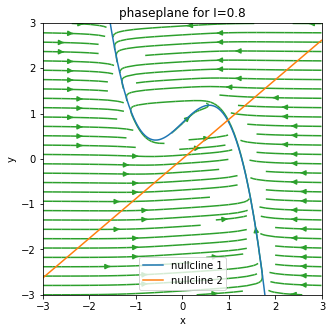

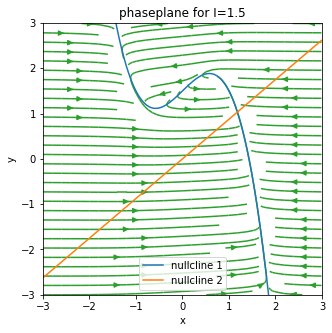

In [0]:
def F(v, w, params):
    return v - v**3 -  w +params[0]

def G(v, w, params):
    return params[1]*(v+params[2]+params[3]*w)

def f_null1(v, params):
    return (v - v**3 ) + params[0]

def f_null2(v, params):
    return -v*params[2]/params[3]
params = [i,0.08,0.7,-0.8]
for i in [0,0.3,0.4,0.8,1.5] :
  params = [i,0.08,0.7,-0.8]
  draw_utils.plot_phaseplane(F, G, f_null1, f_null2, extra_params=params,
                           x_range=[-3,3], y_range=[0-3,3],name='phaseplane for I={}'.format(i))
  title('phaseplane for I={}'.format(i))

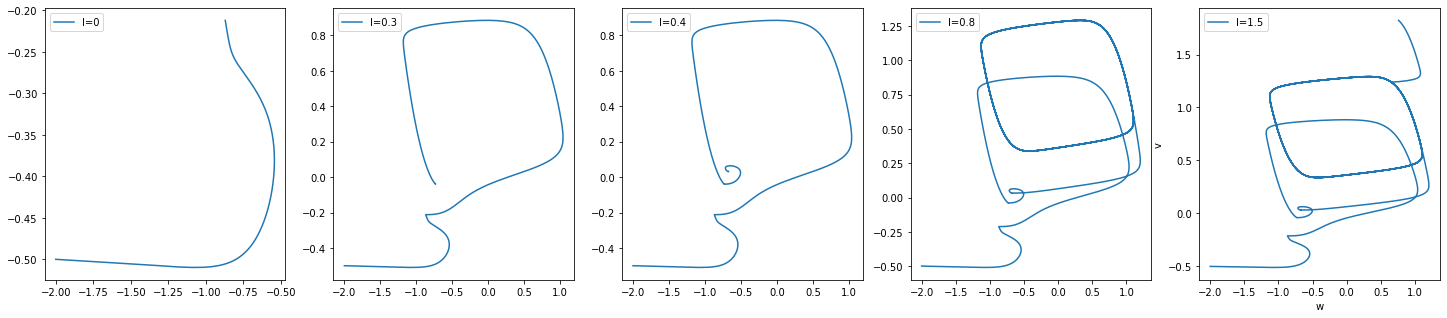

In [0]:
start_scope()
eqs_FHN = '''
dV/dt = V/ms-(V**3)/ms-W/ms+I/ms: 1
dW/dt = (0.08/ms)*(V+0.7-0.8*W): 1
I : 1
'''
Group_2 = NeuronGroup(1, eqs_FHN,method='euler')
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=[25,5])
v_list=[]
w_list=[]
time=200*ms
statemon_V = StateMonitor(Group_2, 'V', record=0)
statemon_W = StateMonitor(Group_2, 'W', record=0)
Group_2.V = -2
Group_2.W = -0.5
for counter,i in enumerate([0,0.3,0.4,0.8,1.5]):
  Group_2.I = i
  run(time)
  v_list.append(statemon_V.V[0])
  w_list.append(statemon_W.W[0])
  ax[counter].plot(statemon_V.V[0],statemon_W.W[0],label='I={}'.format(i))
  ax[counter].legend(loc='best',fontsize=10)
ylabel('v')
xlabel('w')

No handles with labels found to put in legend.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


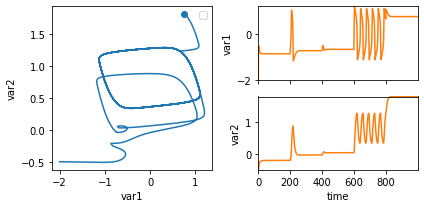

In [0]:
draw_utils.phaseplane_animation(statemon_V.t/ms, statemon_V.V[0], statemon_W.W[0])

animation file (a .gif file) attache to file 


det( J -𝜆 I) = 𝜆^2 + 𝜆 (−0.936+3*𝑉^2) + 0.016 + 0.192 𝑉^2 = 0



so eignvalues only depend on V parameter

we know if real all eignvalues be negetive , that points will be stable 

 

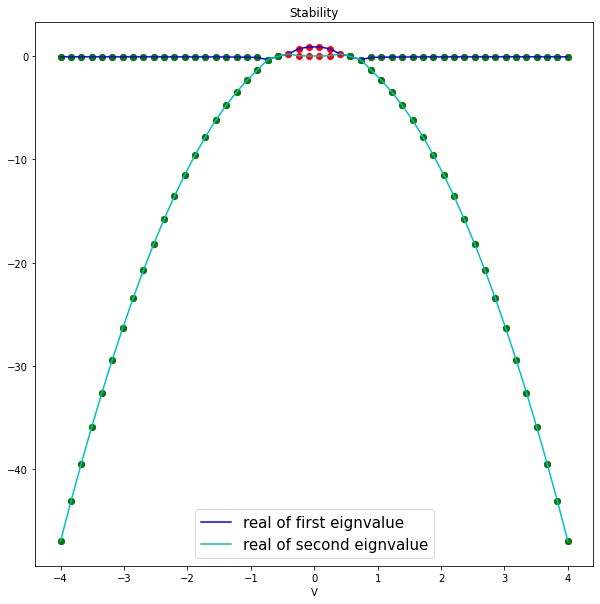

In [179]:
v_list=[]
S_1_list=[]
S_2_list=[]
fig,ax = subplots(figsize=[10,10])
for v in np.linspace(-4,4,50):
  a=1
  b = -0.936+3*v**2
  c = 0.192*v**2+0.016
  Sol_1 = (-1*b + np.sqrt(b**2 - 4*a*c))/(2*a) if (b**2-4*a*c)>0 else complex(-1*b,np.sqrt(-1*((b**2-4*a*c))))/(2*a)
  Sol_2 = (-1*b - np.sqrt(b**2 - 4*a*c))/(2*a) if (b**2-4*a*c)>0 else complex(-1*b,-1*np.sqrt(-1*((b**2-4*a*c))))/(2*a)
  v_list.append(v)
  S_1_list.append(np.real(Sol_1))
  S_2_list.append(np.real(Sol_2))
ax.plot(v_list,S_1_list,'-b',label='real of first eignvalue')
ax.plot(v_list,S_2_list,'-c',label='real of second eignvalue')
ax.legend(loc='best',fontsize=15)
ax.set_xlabel('V')
ax.set_title('Stability')


for v in np.linspace(-4,4,50):
  a=1
  b = -0.936+3*v**2
  c = 0.192*v**2+0.016
  Sol_1 = (-1*b + np.sqrt(b**2 - 4*a*c))/(2*a) if (b**2-4*a*c)>0 else complex(-1*b,np.sqrt(-1*((b**2-4*a*c))))/(2*a)
  Sol_2 = (-1*b - np.sqrt(b**2 - 4*a*c))/(2*a) if (b**2-4*a*c)>0 else complex(-1*b,-1*np.sqrt(-1*((b**2-4*a*c))))/(2*a)
  ax.scatter(v,np.real(Sol_1),c='r')
  ax.scatter(v,np.real(Sol_2),c='r')
  if np.real(Sol_1)<0 and np.real(Sol_2)<0:
    ax.scatter(v,np.real(Sol_1),c='g')
    ax.scatter(v,np.real(Sol_2),c='g')

as we can see in the figure , where real part of  eignvalue 1 and 2 are negetive, there is stable.
( red points are not stable and green points are stable

Text(0, 0.5, 'I')

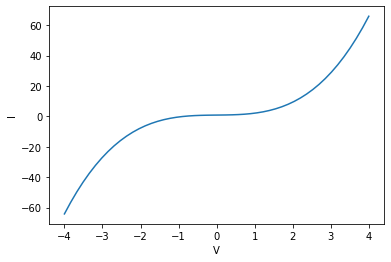

In [182]:
v=np.linspace(-4,4,50)
plot(v,v**3 + 0.25*v+7/8)
xlabel('V')
ylabel('I')

as we can see in the plot, just for v = 0 we will have a fixed point
so there is always one fixed point for all currents
for I < 0 fixed point is un stable and for I > 0 fixed point became stable